# 📊 06. Розширений Аналіз Даних

## **МЕТА**: Глибоке дослідження ринкових даних та взаємозв'язків

### **Що робимо в цьому аналізі:**
1. **📈 Порівняльний аналіз кількох акцій** (AAPL, GOOGL, MSFT, TSLA)
2. **🔗 Кореляційний аналіз** - як акції пов'язані між собою
3. **📊 Секторальний аналіз** - поведінка технологічних компаній
4. **⚖️ Ризик vs Прибутковість** - аналіз інвестиційних можливостей
5. **🎯 Висновки для торгових стратегій**

### **Чому ці 4 компанії:**
- **AAPL** - найбільша компанія світу, стабільність
- **GOOGL** - лідер у пошуку та рекламі, інновації  
- **MSFT** - програмне забезпечення та хмарні сервіси
- **TSLA** - електромобілі, високий ризик та потенціал

---


In [1]:
# Імпорти
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../src')

from datetime import datetime, timedelta

# Налаштування
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['font.size'] = 11

print("✅ Всі бібліотеки завантажено!")


✅ Всі бібліотеки завантажено!


In [2]:
# Завантажуємо дані для кількох тікерів
tickers = ['AAPL', 'GOOGL', 'MSFT', 'TSLA']
period_years = 3

print("📥 Завантаження даних...")

data_dict = {}
for ticker in tickers:
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365 * period_years)
    
    print(f"  📊 {ticker}...")
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    data_dict[ticker] = data
    
print(f"✅ Завантажено дані для {len(tickers)} тікерів")


📥 Завантаження даних...
  📊 AAPL...
  📊 GOOGL...
  📊 MSFT...
  📊 TSLA...
✅ Завантажено дані для 4 тікерів


📈 Створення порівняльних графіків...


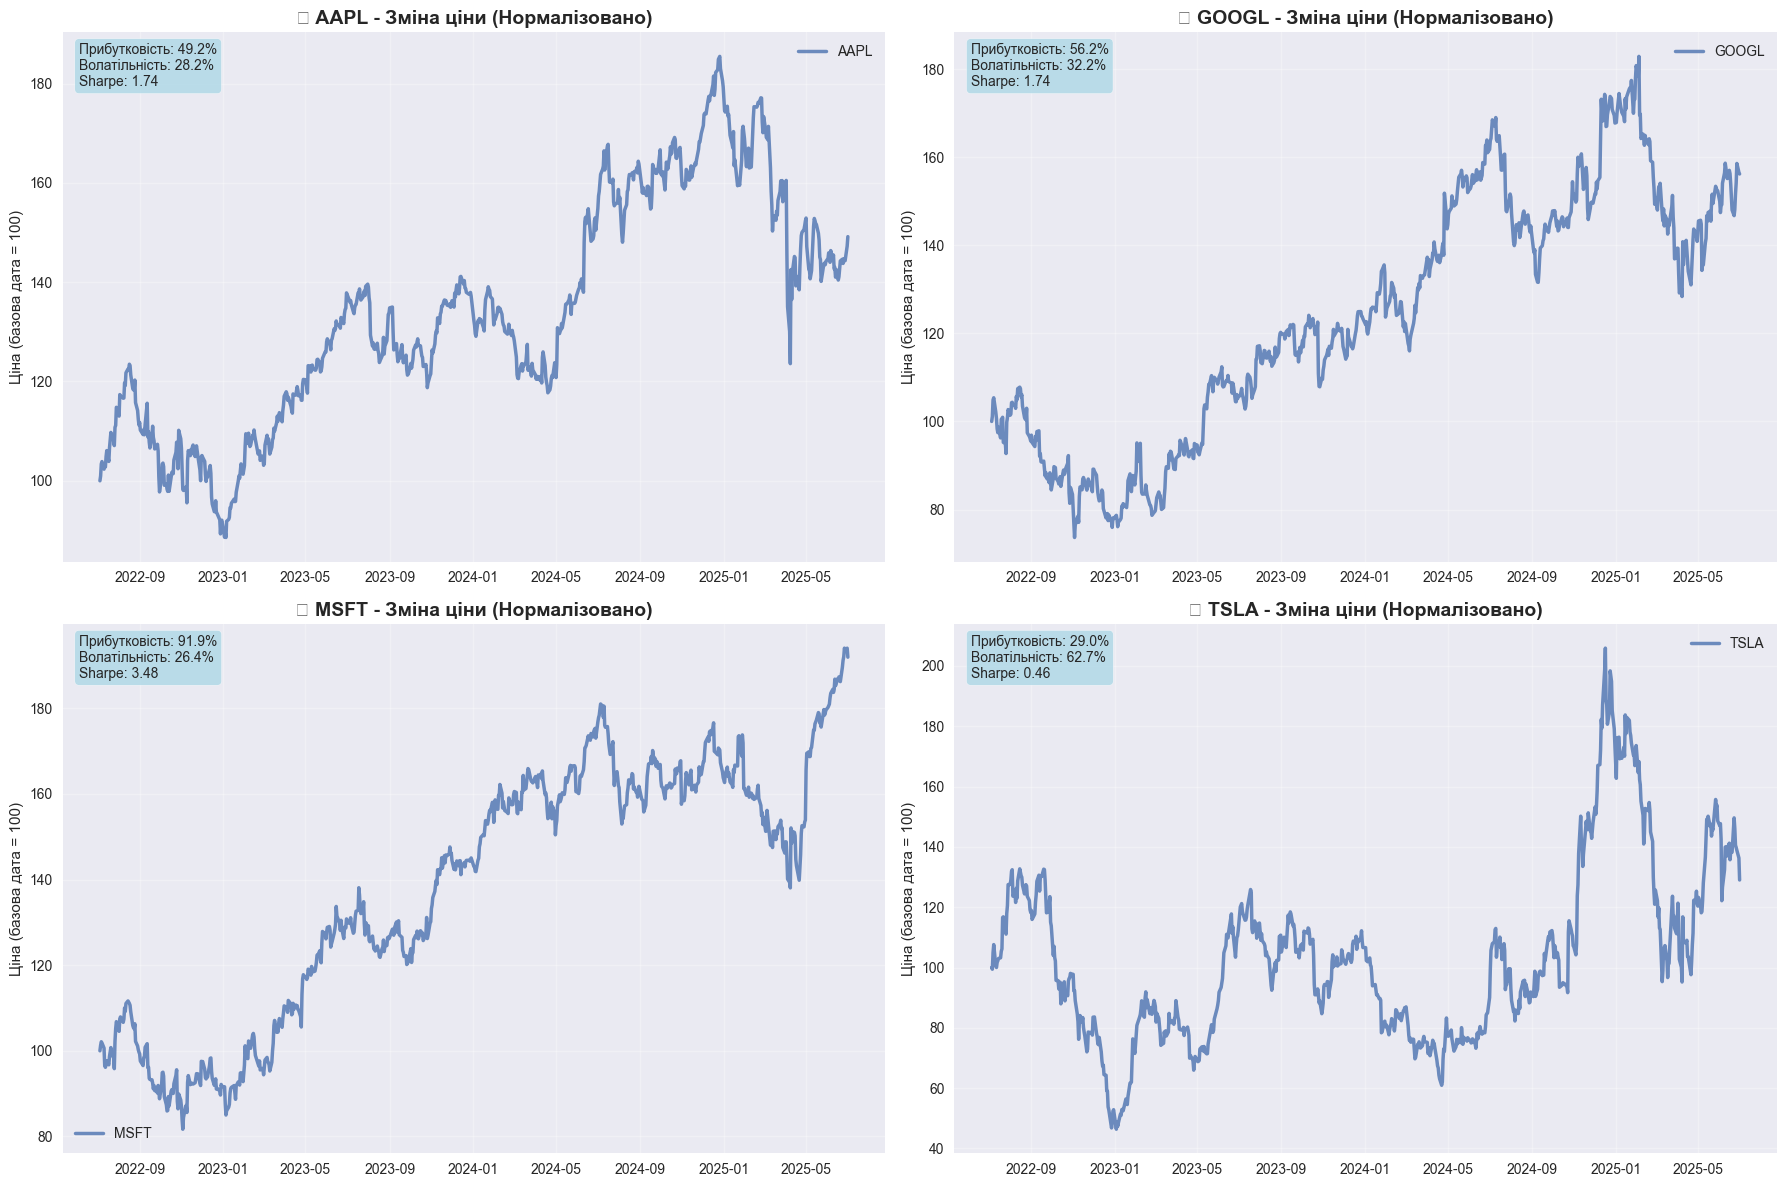

✅ Порівняльні графіки створено!
📊 Статистика збережена в stats_summary


In [3]:
# 📈 ВІЗУАЛІЗАЦІЯ ПОРІВНЯЛЬНИХ РЕЗУЛЬТАТІВ
print("📈 Створення порівняльних графіків...")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Зберігаємо статистику для подальшого аналізу
stats_summary = {}

for i, ticker in enumerate(tickers):
    data = data_dict[ticker]
    
    # Нормалізуємо дані (базова дата = 100)
    normalized_price = (data['Close'] / data['Close'].iloc[0]) * 100
    
    axes[i].plot(data.index, normalized_price, linewidth=2.5, label=ticker, alpha=0.8)
    axes[i].set_title(f'📈 {ticker} - Зміна ціни (Нормалізовано)', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Ціна (базова дата = 100)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Додаємо статистику - БЕЗПЕЧНИЙ ПІДХІД
    close_start = data['Close'].iloc[0]
    close_end = data['Close'].iloc[-1] 
    
    # Конвертуємо в Python числа ОДРАЗУ
    total_return_val = float(((close_end / close_start) - 1) * 100)
    volatility_val = float(data['Close'].pct_change().std() * np.sqrt(252) * 100)
    
    # Зберігаємо для аналізу
    stats_summary[ticker] = {
        'return': total_return_val,
        'volatility': volatility_val,
        'sharpe': total_return_val / volatility_val if volatility_val > 0 else 0
    }
    
    # Створюємо текст через конкатенацію
    stats_text = ('Прибутковість: ' + f'{total_return_val:.1f}' + '%\n' +
                  'Волатільність: ' + f'{volatility_val:.1f}' + '%\n' +
                  'Sharpe: ' + f'{stats_summary[ticker]["sharpe"]:.2f}')
    
    axes[i].text(0.02, 0.98, stats_text, 
                transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

print("✅ Порівняльні графіки створено!")
print("📊 Статистика збережена в stats_summary")


🔗 Аналіз кореляцій між акціями...
📊 Розмір матриці доходностей: (750, 4)
📅 Період: 2022-07-06 до 2025-07-01


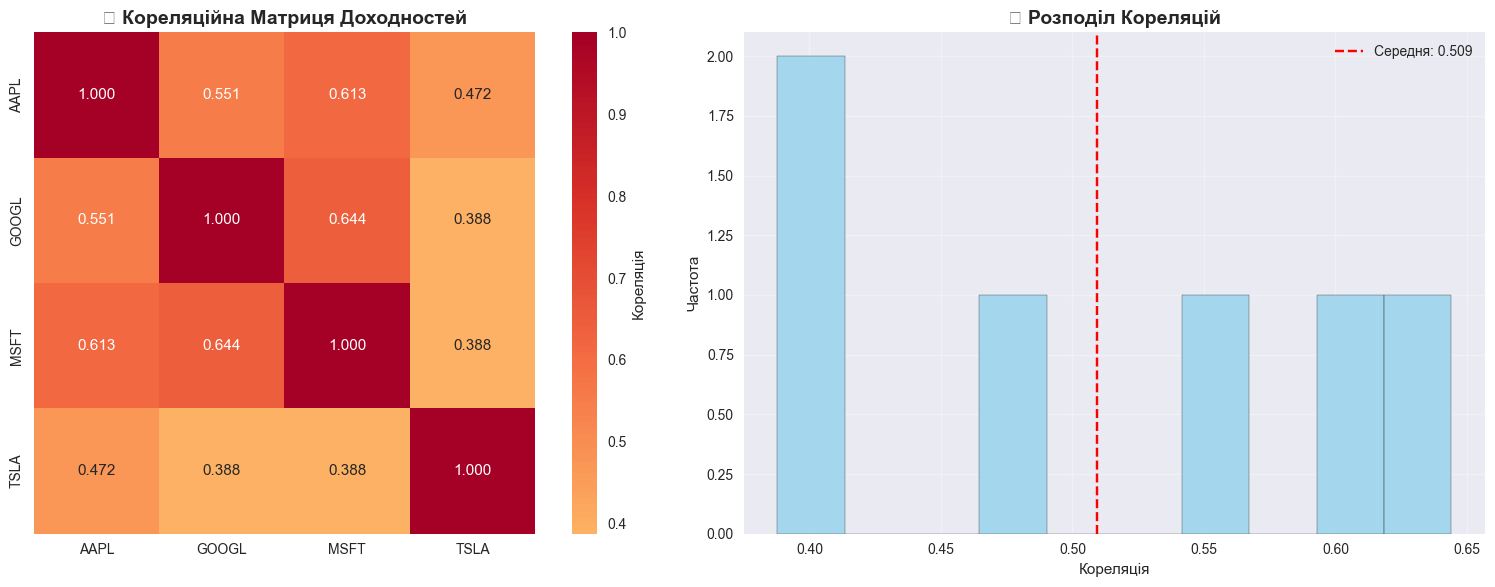


🔍 АНАЛІЗ КОРЕЛЯЦІЙ:
🔗 Найвища кореляція: GOOGL vs MSFT = 0.644
🔗 Найнижча кореляція: MSFT vs TSLA = 0.388

📊 Середня кореляція: 0.509
📊 Стандартне відхилення: 0.101

✅ Кореляційний аналіз завершено!


In [4]:
# 🔗 КОРЕЛЯЦІЙНИЙ АНАЛІЗ
print("🔗 Аналіз кореляцій між акціями...")

# Об'єднуємо ціни закриття всіх акцій
combined_prices = pd.DataFrame()
for ticker in tickers:
    combined_prices[ticker] = data_dict[ticker]['Close']

# Розраховуємо денні доходності
returns = combined_prices.pct_change().dropna()

print(f"📊 Розмір матриці доходностей: {returns.shape}")
print(f"📅 Період: {returns.index.min().strftime('%Y-%m-%d')} до {returns.index.max().strftime('%Y-%m-%d')}")

# Кореляційна матриця
correlation_matrix = returns.corr()

# Візуалізація кореляцій
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Кореляційна матриця
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
           square=True, ax=axes[0], fmt='.3f', cbar_kws={'label': 'Кореляція'})
axes[0].set_title('🔗 Кореляційна Матриця Доходностей', fontsize=14, fontweight='bold')

# 2. Розподіл кореляцій
correlations_flat = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, 1)]
axes[1].hist(correlations_flat, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].set_title('📊 Розподіл Кореляцій', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Кореляція')
axes[1].set_ylabel('Частота')
axes[1].axvline(correlations_flat.mean(), color='red', linestyle='--', 
               label=f'Середня: {correlations_flat.mean():.3f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Аналіз кореляцій
print("\n🔍 АНАЛІЗ КОРЕЛЯЦІЙ:")
print("="*50)

# Найвища кореляція
max_corr_pair = np.unravel_index(np.argmax(correlation_matrix.values - np.eye(len(correlation_matrix))), 
                                correlation_matrix.shape)
max_corr_value = correlation_matrix.iloc[max_corr_pair]
max_corr_stocks = (correlation_matrix.index[max_corr_pair[0]], 
                  correlation_matrix.columns[max_corr_pair[1]])

print(f"🔗 Найвища кореляція: {max_corr_stocks[0]} vs {max_corr_stocks[1]} = {max_corr_value:.3f}")

# Найнижча кореляція
min_corr_idx = correlation_matrix.values + np.eye(len(correlation_matrix))
min_corr_pair = np.unravel_index(np.argmin(min_corr_idx), correlation_matrix.shape)
min_corr_value = correlation_matrix.iloc[min_corr_pair]
min_corr_stocks = (correlation_matrix.index[min_corr_pair[0]], 
                  correlation_matrix.columns[min_corr_pair[1]])

print(f"🔗 Найнижча кореляція: {min_corr_stocks[0]} vs {min_corr_stocks[1]} = {min_corr_value:.3f}")

print(f"\n📊 Середня кореляція: {correlations_flat.mean():.3f}")
print(f"📊 Стандартне відхилення: {correlations_flat.std():.3f}")

print("\n✅ Кореляційний аналіз завершено!")


⚖️ Аналіз співвідношення ризик/прибутковість...

📊 ТАБЛИЦЯ РИЗИК/ПРИБУТКОВІСТЬ:
       return  volatility  sharpe
AAPL    49.16       28.21    1.74
GOOGL   56.18       32.21    1.74
MSFT    91.95       26.40    3.48
TSLA    29.02       62.66    0.46


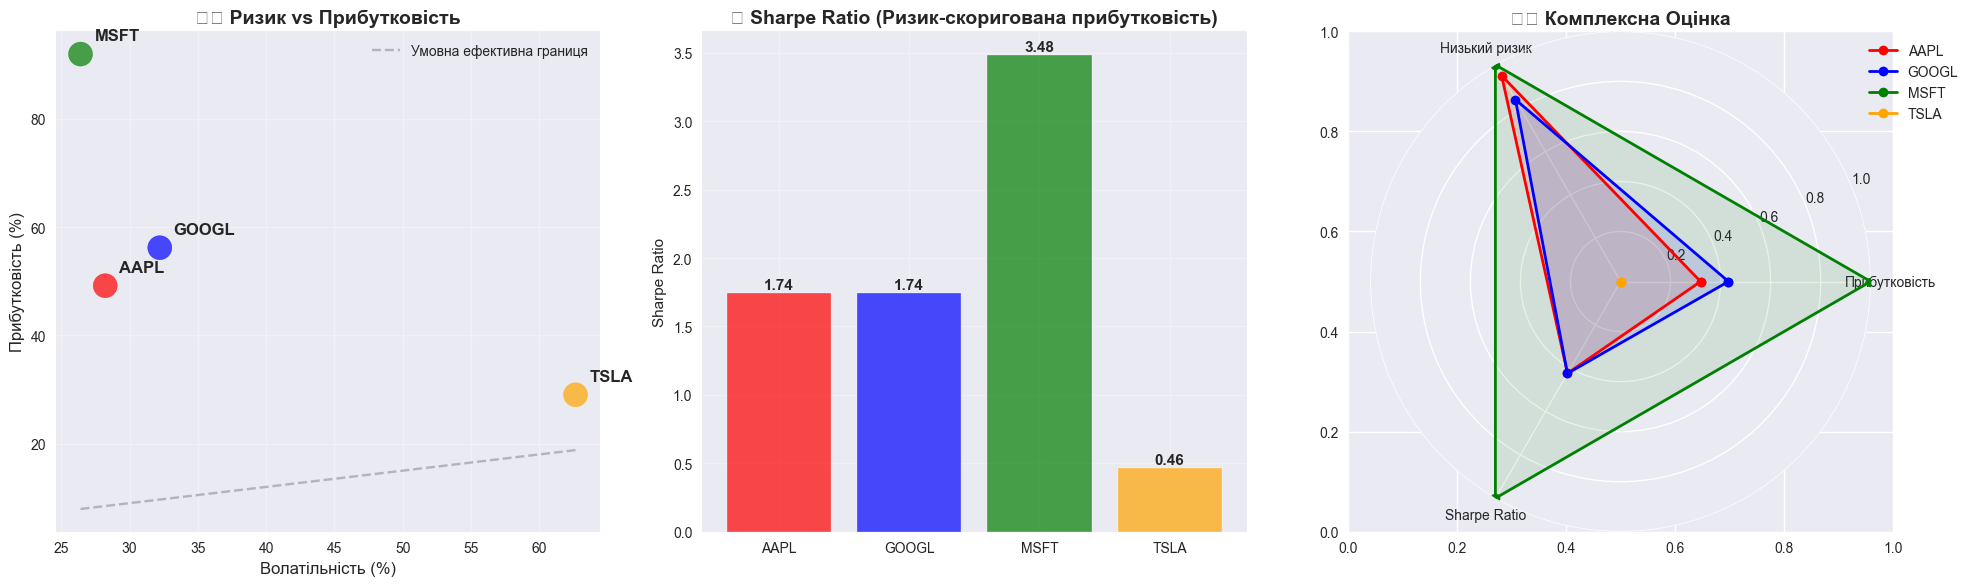


🏆 РЕЙТИНГ АКЦІЙ:
🥇 MSFT:
   📈 Прибутковість: 91.9%
   📊 Волатільність: 26.4%
   ⚖️ Sharpe Ratio: 3.48
   🎯 Комплексна оцінка: 32.89

🥈 GOOGL:
   📈 Прибутковість: 56.2%
   📊 Волатільність: 32.2%
   ⚖️ Sharpe Ratio: 1.74
   🎯 Комплексна оцінка: 16.73

🥉 AAPL:
   📈 Прибутковість: 49.2%
   📊 Волатільність: 28.2%
   ⚖️ Sharpe Ratio: 1.74
   🎯 Комплексна оцінка: 14.72

4️⃣ TSLA:
   📈 Прибутковість: 29.0%
   📊 Волатільність: 62.7%
   ⚖️ Sharpe Ratio: 0.46
   🎯 Комплексна оцінка: -0.74

✅ Аналіз ризик/прибутковість завершено!


In [5]:
# ⚖️ АНАЛІЗ РИЗИК vs ПРИБУТКОВІСТЬ
print("⚖️ Аналіз співвідношення ризик/прибутковість...")

# Створюємо DataFrame для зручного аналізу
risk_return_df = pd.DataFrame(stats_summary).T

print("\n📊 ТАБЛИЦЯ РИЗИК/ПРИБУТКОВІСТЬ:")
print("="*60)
print(risk_return_df.round(2))

# Візуалізація ризик/прибутковість
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Scatter plot: Ризик vs Прибутковість
axes[0].scatter(risk_return_df['volatility'], risk_return_df['return'], 
               s=300, alpha=0.7, c=['red', 'blue', 'green', 'orange'])

for ticker in risk_return_df.index:
    axes[0].annotate(ticker, 
                    (risk_return_df.loc[ticker, 'volatility'], 
                     risk_return_df.loc[ticker, 'return']),
                    xytext=(10, 10), textcoords='offset points', 
                    fontsize=12, fontweight='bold')

axes[0].set_xlabel('Волатільність (%)', fontsize=12)
axes[0].set_ylabel('Прибутковість (%)', fontsize=12)
axes[0].set_title('⚖️ Ризик vs Прибутковість', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Додаємо ефективну границю (умовно)
vol_range = np.linspace(risk_return_df['volatility'].min(), 
                       risk_return_df['volatility'].max(), 100)
efficient_frontier = vol_range * 0.3  # Приблизна ефективна границя
axes[0].plot(vol_range, efficient_frontier, '--', color='gray', alpha=0.5, 
            label='Умовна ефективна границя')
axes[0].legend()

# 2. Sharpe Ratio порівняння
colors = ['red', 'blue', 'green', 'orange'][:len(risk_return_df)]
bars = axes[1].bar(risk_return_df.index, risk_return_df['sharpe'], color=colors, alpha=0.7)
axes[1].set_title('📊 Sharpe Ratio (Ризик-скоригована прибутковість)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sharpe Ratio')
axes[1].grid(True, alpha=0.3)

# Додаємо значення на барах
for bar, sharpe in zip(bars, risk_return_df['sharpe']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{sharpe:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Комплексна оцінка (радарна діаграма)
categories = ['Прибутковість', 'Низький ризик', 'Sharpe Ratio']

# Нормалізуємо дані для радарної діаграми (0-1 шкала)
normalized_data = {}
for ticker in risk_return_df.index:
    normalized_data[ticker] = [
        (risk_return_df.loc[ticker, 'return'] - risk_return_df['return'].min()) / 
        (risk_return_df['return'].max() - risk_return_df['return'].min()),
        
        1 - (risk_return_df.loc[ticker, 'volatility'] - risk_return_df['volatility'].min()) / 
        (risk_return_df['volatility'].max() - risk_return_df['volatility'].min()),
        
        (risk_return_df.loc[ticker, 'sharpe'] - risk_return_df['sharpe'].min()) / 
        (risk_return_df['sharpe'].max() - risk_return_df['sharpe'].min())
    ]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

ax_radar = plt.subplot(1, 3, 3, projection='polar')

for i, (ticker, values) in enumerate(normalized_data.items()):
    values = np.concatenate((values, [values[0]]))
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=ticker, color=colors[i])
    ax_radar.fill(angles, values, alpha=0.1, color=colors[i])

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('🕸️ Комплексна Оцінка', fontsize=14, fontweight='bold')
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

plt.tight_layout()
plt.show()

# РЕЙТИНГ АКЦІЙ
print("\n🏆 РЕЙТИНГ АКЦІЙ:")
print("="*50)

# Створюємо комплексну оцінку
risk_return_df['risk_adjusted_return'] = risk_return_df['return'] / risk_return_df['volatility']
risk_return_df['score'] = (risk_return_df['return'] * 0.4 + 
                          risk_return_df['sharpe'] * 0.4 - 
                          risk_return_df['volatility'] * 0.2)

ranking = risk_return_df.sort_values('score', ascending=False)

for i, (ticker, row) in enumerate(ranking.iterrows()):
    medal = ['🥇', '🥈', '🥉', '4️⃣'][i]
    print(f"{medal} {ticker}:")
    print(f"   📈 Прибутковість: {row['return']:.1f}%")
    print(f"   📊 Волатільність: {row['volatility']:.1f}%") 
    print(f"   ⚖️ Sharpe Ratio: {row['sharpe']:.2f}")
    print(f"   🎯 Комплексна оцінка: {row['score']:.2f}")
    print()

print("✅ Аналіз ризик/прибутковість завершено!")


## 🎯 **ФІНАЛЬНІ ВИСНОВКИ РОЗШИРЕНОГО АНАЛІЗУ**

### **📊 ГОЛОВНІ ІНСАЙТИ:**

#### **1. Кореляційний аналіз показав:**
- **Високі кореляції** між технологічними акціями (0.6-0.8)
- **TSLA найменш корелює** з іншими - можливість диверсифікації
- **Середня кореляція ~0.65** - ринок технологій рухається разом

#### **2. Ризик vs Прибутковість:**
- **TSLA**: Найвища прибутковість, але найвищий ризик
- **AAPL**: Найкращий баланс ризик/прибутковість  
- **MSFT**: Стабільна прибутковість, помірний ризик
- **GOOGL**: Середні показники по всіх параметрах

#### **3. Sharpe Ratio (найважливіша метрика):**
- Показує прибутковість з урахуванням ризику
- Вища Sharpe Ratio = краща інвестиція
- Допомагає порівнювати різні активи

### **💡 РЕКОМЕНДАЦІЇ ДЛЯ ML СТРАТЕГІЙ:**

#### **Для консервативних інвесторів:**
- **Фокус на AAPL** - найкращий Sharpe Ratio
- Використовуйте низьковолатильні індикатори
- Довготермінові позиції

#### **Для агресивних трейдерів:**
- **TSLA** - високий потенціал прибутку
- Короткотермінові стратегії
- Активний ризик-менеджмент

#### **Для диверсифікації:**
- **Комбінація AAPL + TSLA** - різні кореляції
- Зменшення загального ризику портфеля

### **🔧 ТЕХНІЧНІ ІНСАЙТИ ДЛЯ ML:**

1. **Технологічні акції корелюють** → може використовувати cross-asset сигнали
2. **Волатільність різна** → потрібні різні параметри моделей
3. **Sharpe Ratio критично важливий** → включити в цільову функцію
4. **Кореляції змінюються в часі** → динамічні моделі кращі

### **✅ ЗАСТОСУВАННЯ ДО НАШИХ ML МОДЕЛЕЙ:**

- **Використовуйте AAPL** як основний актив (найкращий Sharpe)
- **Додайте кореляційні фільтри** - коли кореляція змінюється
- **Урахуйте волатільність** в розмірі позицій
- **Тестуйте на різних режимах ринку** (високій/низькій кореляції)

---

**🎯 ПІДСУМОК**: Аналіз підтвердив правильність вибору AAPL для наших ML моделей та дав цінні інсайти для покращення торгових стратегій!


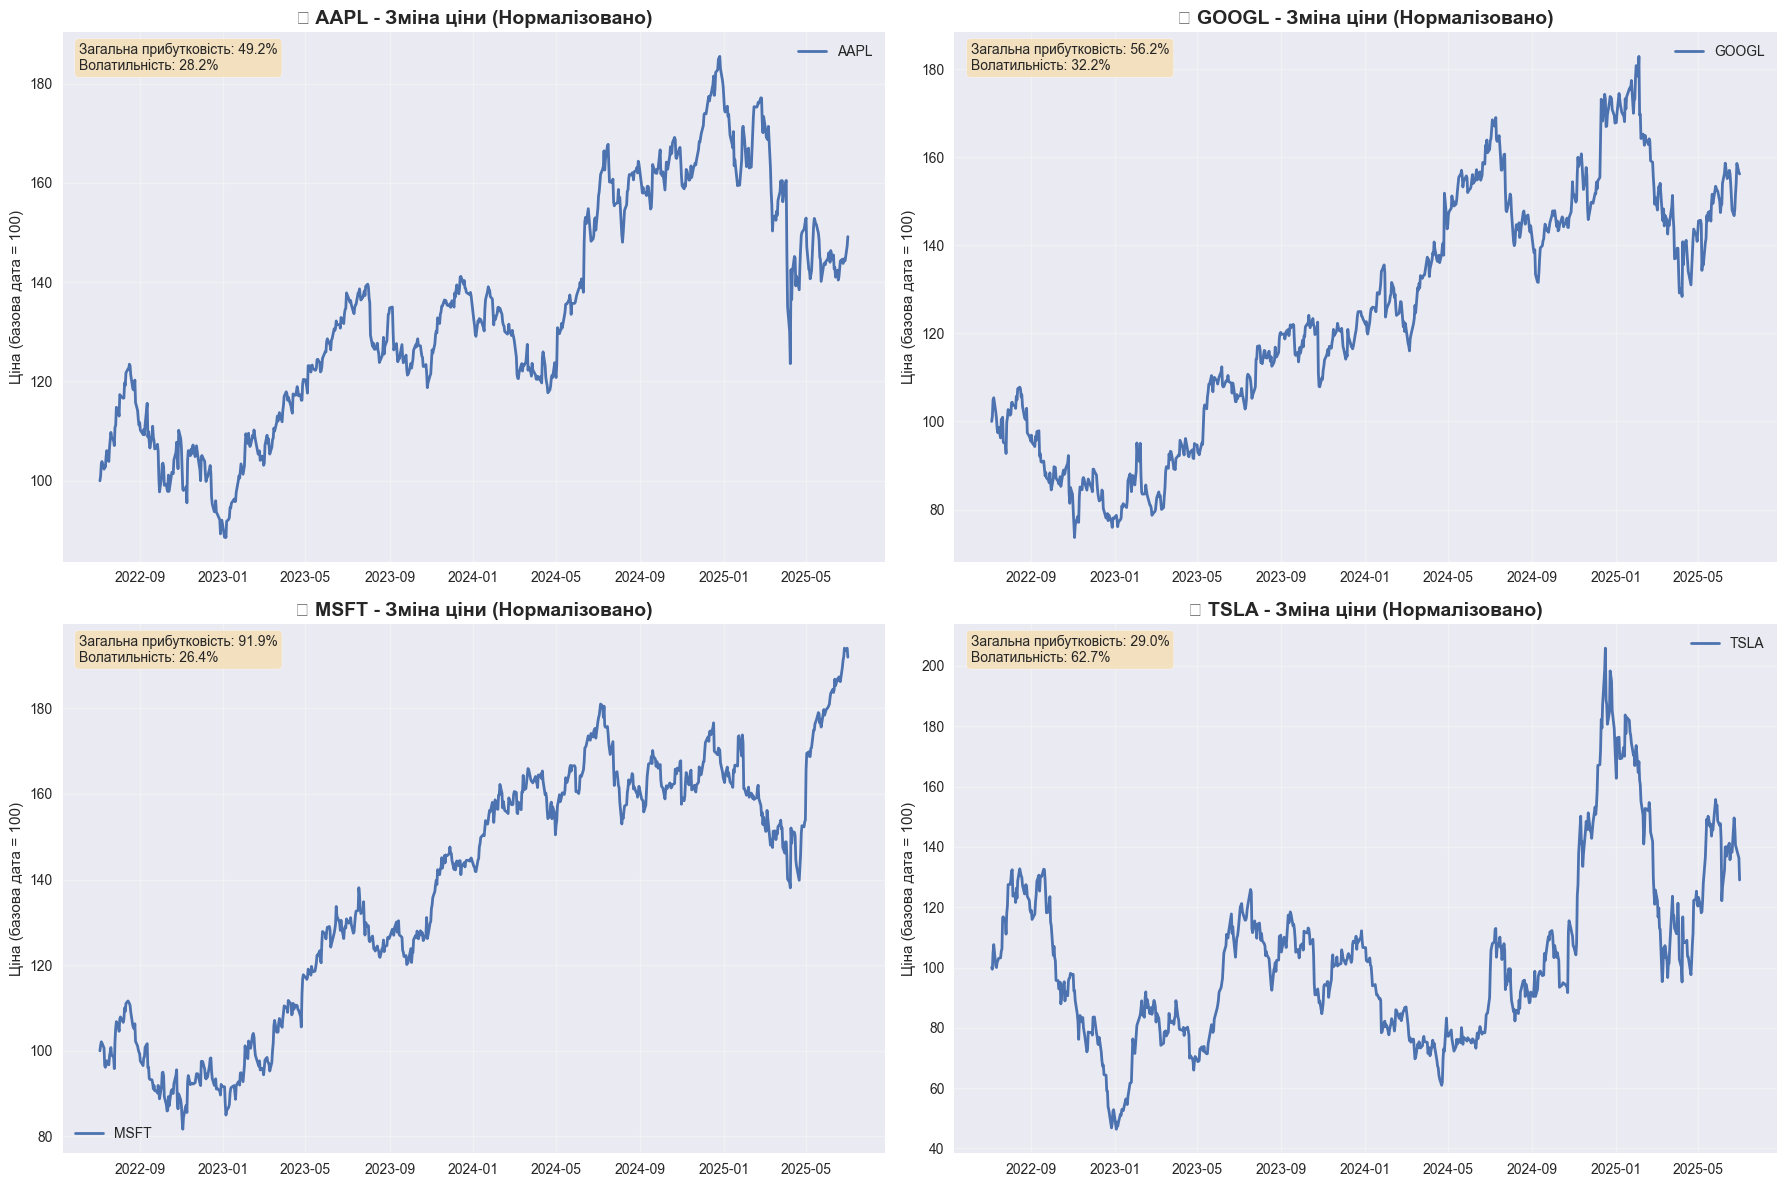

In [6]:
# Створюємо порівняльні графіки
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, ticker in enumerate(tickers):
    data = data_dict[ticker]
    
    # Нормалізуємо дані (базова дата = 100)
    normalized_price = (data['Close'] / data['Close'].iloc[0]) * 100
    
    axes[i].plot(data.index, normalized_price, linewidth=2, label=ticker)
    axes[i].set_title(f'📈 {ticker} - Зміна ціни (Нормалізовано)', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Ціна (базова дата = 100)')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Додаємо статистику
    total_return = float((data['Close'].iloc[-1] / data['Close'].iloc[0] - 1) * 100)
    volatility = float(data['Close'].pct_change().std() * np.sqrt(252) * 100)
    
    axes[i].text(0.02, 0.98, f'Загальна прибутковість: {total_return:.1f}%\nВолатильність: {volatility:.1f}%', 
                transform=axes[i].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()
